Model Accuracy: 0.7549668874172185


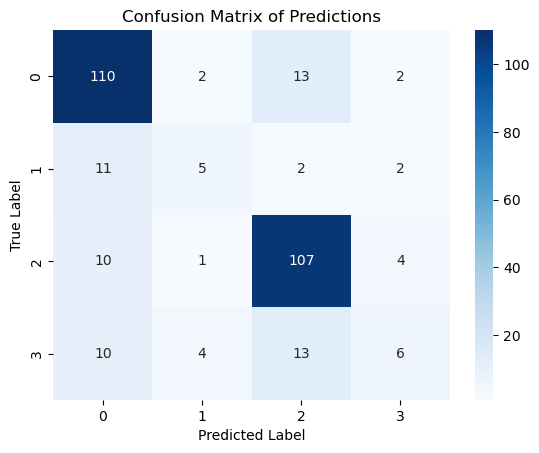

['enhanced_crop_suitability_model.joblib']

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


data = pd.read_csv('All_data_with_climate.csv')

# Replace NaN values in numeric columns with their column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


bins = [0, 1, 2, 3, 4]  
labels = ['1', '2', '3', '4']  
data['climate.category'] = pd.cut(data['climate.category'], bins=bins, labels=labels, include_lowest=True)

# Ensure the target variable is categorical (optional step for clarity)
data['climate.category'] = data['climate.category'].astype('category')

# Feature selection
features = ['temp.growing.season', 'precip.growing.season']
target = 'climate.category'

# Preparing the data
X = data[features]
y = data[target]

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model creation and training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction and evaluation
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix of Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Save the model
joblib.dump(model, 'enhanced_crop_suitability_model.joblib')
